<a href="https://colab.research.google.com/github/nkousik18/Projects/blob/main/Children_screentime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Cleaning:

- Data describes  screen time of 9712 children.
- It has 8 columns consisting of data types like int, object, bool, float.
- Health Impacts have 3218 missing columns, so replaced them with "Unknown".


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [3]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
df.shape

(9712, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [6]:
df.isnull().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [7]:
df['Health_Impacts'].replace(np.nan, "Unknown" , inplace=True)

/tmp/ipython-input-3828704883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Impacts'].replace(np.nan, "Unknown" , inplace=True)


# Initial analysis:


- Data consists of children from age 8 to 18 years.
- Data has a well banalnced mix of 4770 female and 4942 male children.
- Average screen time ranges from 1.7 hrs to 13.8 hrs with an average of 4.3 hrs.
- There are 4 primary devices of which Laptop has the highest average screent time and lowest education to recreation ration showing that Laptops are degrading kids health more than other devices.
- Both male and female have similar average daily screen time.


In [8]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [9]:
df.groupby("Gender")["Age"].count()

,Age
Gender,
Female,4770
Male,4942


In [10]:
df.groupby("Primary_Device")["Avg_Daily_Screen_Time_hr"].mean()

,Avg_Daily_Screen_Time_hr
Primary_Device,
Laptop,4.459086
Smartphone,4.388925
TV,4.287752
Tablet,4.226005


In [11]:
df.groupby("Primary_Device")["Educational_to_Recreational_Ratio"].mean()

,Educational_to_Recreational_Ratio
Primary_Device,
Laptop,0.399002
Smartphone,0.422077
TV,0.443703
Tablet,0.446005


In [12]:
df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean()

,Avg_Daily_Screen_Time_hr
Gender,
Female,4.327021
Male,4.377754


In [13]:
df.groupby("Gender")["Educational_to_Recreational_Ratio"].mean()

,Educational_to_Recreational_Ratio
Gender,
Female,0.426694
Male,0.427740


# Exploratory data analysis:

In [14]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7b7f78cac450>,
 [Text(0.10232873888371102, 1.0952300348321669, 'Smartphone'),
  Text(-0.8964399796618683, -0.6374914610124826, 'TV'),
  Text(0.34120511428918565, -1.0457433097959097, 'Laptop'),
  Text(1.0149006580310098, -0.424236554681729, 'Tablet')],
 [Text(0.05581567575475146, 0.5973982008175455, '47.03%'),
  Text(-0.48896726163374626, -0.3477226150977177, '25.61%'),
  Text(0.18611188052137398, -0.5704054417068598, '14.75%'),
  Text(0.5535821771078234, -0.2314017570991249, '12.60%')])

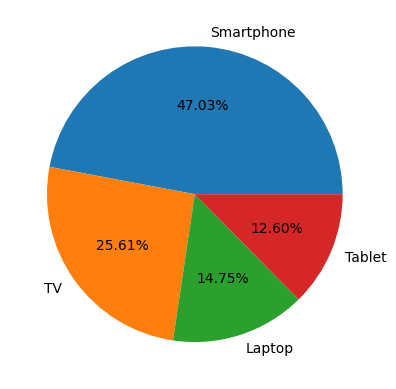

In [15]:
plt.pie(df["Primary_Device"].value_counts(), labels = df["Primary_Device"].value_counts().index, autopct = "%.2f%%")


([<matplotlib.patches.Wedge at 0x7b7f78b74550>,
 [Text(-0.030596911312852165, 1.099574385395601, 'Male'),
  Text(0.030597138520182393, -1.0995743790732744, 'Female')],
 [Text(-0.016689224352464817, 0.5997678465794187, '50.89%'),
  Text(0.016689348283735847, -0.5997678431308769, '49.11%')])

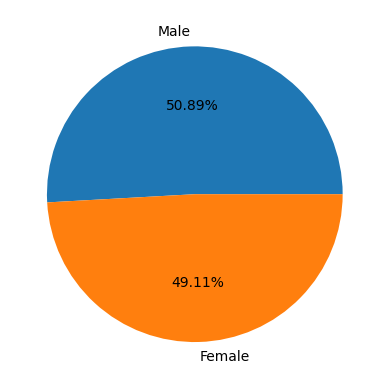

In [16]:
plt.pie(df["Gender"].value_counts(), labels = df["Gender"].value_counts().index, autopct = "%.2f%%")

([<matplotlib.patches.Wedge at 0x7b7f78b4cc50>,
 [Text(-0.661611354048029, 0.8787891761934337, 'Urban'),
  Text(0.6616112213545475, -0.8787892760939587, 'Rural')],
 [Text(-0.36087892038983393, 0.4793395506509638, '70.54%'),
  Text(0.3608788480115714, -0.47933960514215923, '29.46%')])

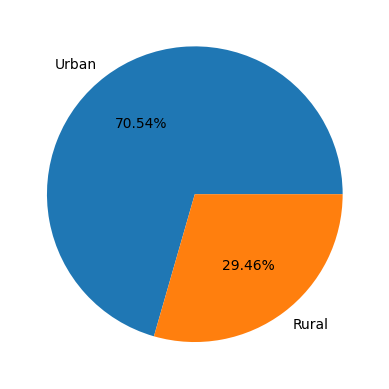

In [17]:
plt.pie(df["Urban_or_Rural"].value_counts(), labels = df["Urban_or_Rural"].value_counts().index, autopct = "%.2f%%")

In [18]:
df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean()

,Avg_Daily_Screen_Time_hr
Urban_or_Rural,
Rural,4.373702
Urban,4.344123


<Axes: xlabel='Avg_Daily_Screen_Time_hr', ylabel='Count'>

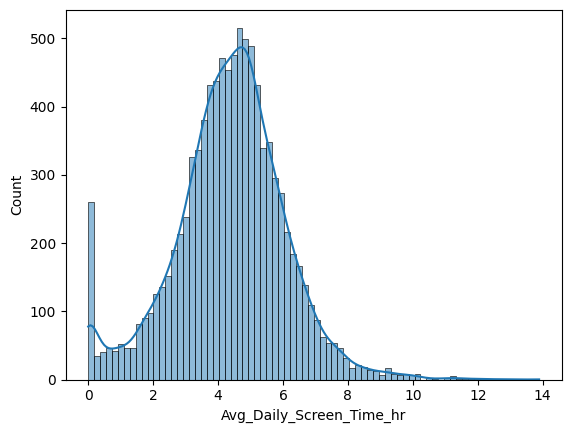

In [19]:
sns.histplot(df["Avg_Daily_Screen_Time_hr"],kde = True)

<Axes: xlabel='Age', ylabel='Count'>

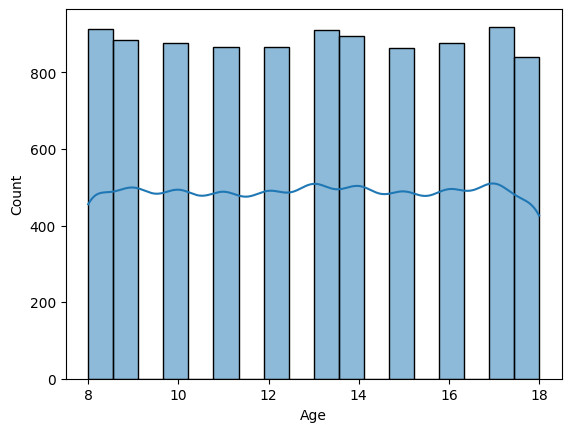

In [20]:
sns.histplot(df["Age"],kde = True)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Poor Sleep'),
  Text(2, 0, 'Poor Sleep, Eye Strain'),
  Text(3, 0, 'Eye Strain'),
  Text(4, 0, 'Poor Sleep, Anxiety'),
  Text(5, 0, 'Poor Sleep, Obesity Risk')])

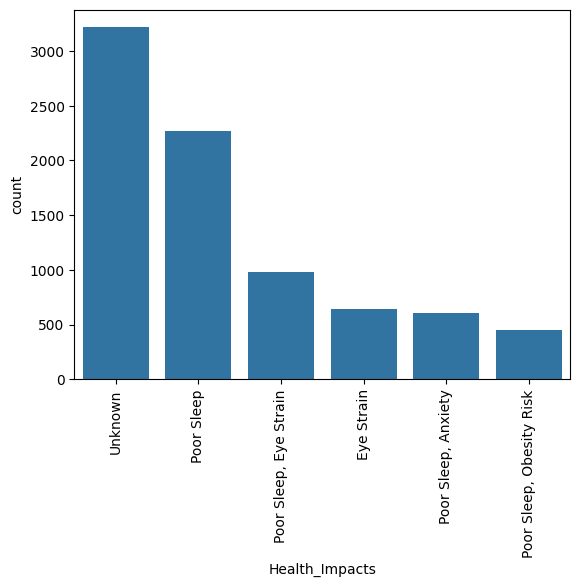

In [21]:
sns.countplot(data = df, x = "Health_Impacts", order = df["Health_Impacts"].value_counts().head(6).index)
plt.xticks(rotation = 90)

<Axes: xlabel='Primary_Device', ylabel='Avg_Daily_Screen_Time_hr'>

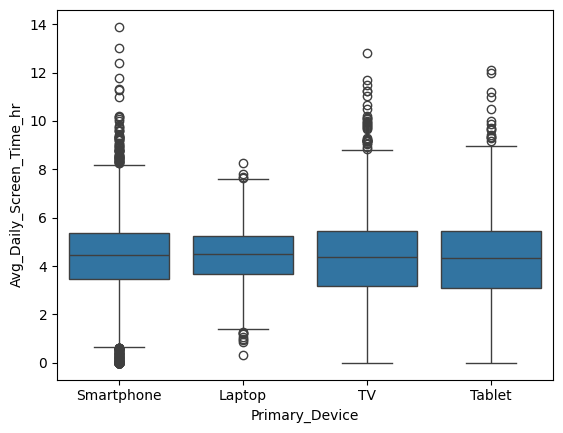

In [22]:

sns.boxplot(x = df["Primary_Device"], y = df["Avg_Daily_Screen_Time_hr"])

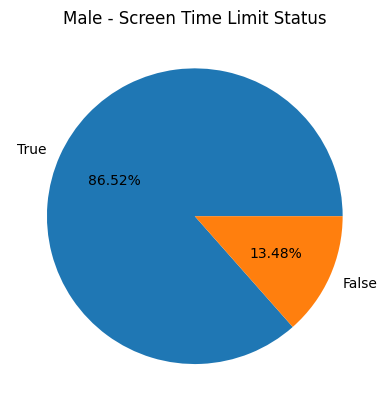

In [23]:
male_df = df[df["Gender"] == "Male"]
counts = male_df["Exceeded_Recommended_Limit"].value_counts()


plt.pie(counts, labels=counts.index, autopct="%.2f%%")
plt.title("Male - Screen Time Limit Status")
plt.show()


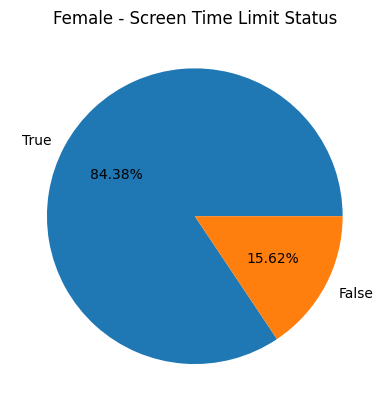

In [24]:



female_df = df[df["Gender"] == "Female"]


counts = female_df["Exceeded_Recommended_Limit"].value_counts()


plt.pie(counts, labels=counts.index, autopct="%.2f%%")
plt.title("Female - Screen Time Limit Status")
plt.show()

([<matplotlib.patches.Wedge at 0x7b7f746c3390>,
 [Text(-0.9873979146522347, 0.48481476683411623, 'True'),
  Text(0.9873979570360856, -0.4848146805130437, 'False')],
 [Text(-0.5385806807194007, 0.2644444182731543, '85.47%'),
  Text(0.5385807038378648, -0.2644443711889329, '14.53%')])

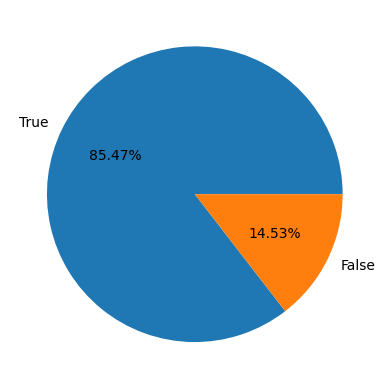

In [25]:
plt.pie(df["Exceeded_Recommended_Limit"].value_counts(), labels = df["Exceeded_Recommended_Limit"].value_counts().index, autopct = "%.2f%%")

<Axes: >

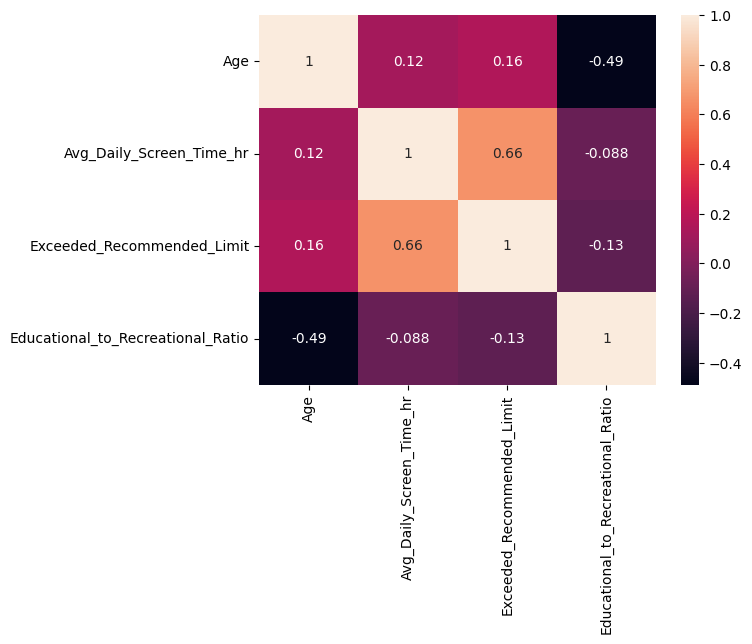

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot= True)

# Key Insights

- 47% of the kids use smartphones as their primary device.
- Box plot shows smartphones have a lot of outliers meaning a lot of kids use smartphones for excessive duration.
- While Laptops have a share of 18% as the choice of primary device, they have the highest average screen time of 4.5hrs and have the least education to recreational ratio. This indicates that laptops are used for entertainment than education.
- The average daily screen time of kids from both urban and rural areas are similar to 4.34hrs
- Top health impacts that kids with excessive screen time are poor sleep, eye strain, anxiety, obesity risk.
- 4 of 5 kids have screen time exceeding the safe screen time limit.
- Age vs Educational-to-Recreational Ratio (-0.49)
- Older children tend to spend relatively less time on educational content compared to recreational use.
- The strongest relationship is between Screen Time and Exceeded Recommended Limit.
- Age also influences content type (educational vs recreational) more than total screen time.

# Recomendations:


**1. Screen Time & Exceeding Recommended Limit (0.66)**

* Insight:  Higher daily screen time strongly correlates with exceeding safety limits.
* Action:

  * Implement parental controls or screen time monitoring tools.
  * Promote screen time guidelines and encourage balanced offline activities.



**2. Age & Educational-to-Recreational Ratio (-0.49)**

* Insight: As children grow older, they tend to spend proportionally less time on educational content.
* Action:

  * Introduce age-specific educational apps or gamified learning.
  * Provide awareness programs for older kids emphasizing productive digital usage.



**3. Age & Screen Time (0.12)**

* Insight: Older kids spend slightly more time on devices, but age is not the main driver.
* Action:

  * Focus interventions on **content quality** rather than just time.
  * Develop programs targeting adolescents on healthy device habits.


**4. Exceeding Limit & Educational-to-Recreational Ratio (-0.13)**

* Insight: Kids exceeding screen limits have slightly lower educational screen use.
* Action:

  * Encourage structured screen time schedules (e.g., study before leisure).
  * Reward balanced usage rather than unrestricted screen access.



**Summary**

* The main priority should be managing total screen time and improving content balance.
* Age-specific strategies** are key: older kids need more educational engagement, while younger kids need general screen time control.

